<a href="https://colab.research.google.com/github/luisChambilla20/ss/blob/main/Arboles.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

![](https://raw.githubusercontent.com/rafneta/CienciaDatosPythonCIDE/master/imagenes/banner.png)

```{contents}
:depth: 4
```

#  Arboles de Decisiones

## ¿Qué son?¿Para que sirven?
Nos permiten enfrentar problemas de clasificación. Esto es un proceso de dos pasos:
1. Aprendizaje: se desarrolla el modelo en un conjunto de entrenamiento
2. Predicción: el modelo entrenado se ocupa para una predicción

![](https://raw.githubusercontent.com/rafneta/CienciaDatosPythonCIDE/master/imagenes/arbol.jpg)

![](https://raw.githubusercontent.com/rafneta/CienciaDatosPythonCIDE/master/imagenes/DT.png)

* Nudo interno: rapresenta un atributo
* rama: representa una decisión
* hoja: representa un resultado

El nudo inciial es el nudo raíz, y de allí vamos recursivamente a partir nuestro arbol. Esta partición se hace en base a los valores de los atributos.

Pues finalmente así a veces pensamos por lo tanto son faciles de interpretar, entender y presentar.

A diferencia de otros algoritmos de ML son "white box" en cuanto nos explciitan las reglas decisionales que utilizaron (a diferencia por ejemplo de las NN)

### Ventajas

* Son faciles de interpretar y visualizar
* Pueden facilmente capturar patrones no lineales
* No necesitan de pre procesamiento de los datos como la normalización
* Es no parametrico así no tenemos que hacer hipotesis sobre la distribución
* Puede ayudarnos en la predicción de NAs y en la elección de variables
* Podemos manejar problemas con alta dimensionalidad con una buena precision
* su entrenamiento es más rapido con respecto a otro algoritmos como las NN

Su tiempo de elaboración dependerá del numero de caracteristicas y del numero de datos que necesitan ser procesados.

Estimamos la desigualdad con [arboles de regresión] (https://openknowledge.worldbank.org/handle/10986/29410)

### Desventajas

* Son sensibles a datos ruidosos
* Poca varianza de los datos puede dar arboles diferentes. Se puede resolver por medio de bagging and boosting
* Son sesgados cuando el dataset no es balanceado
* Overfitting

Ensemble: tecnica de ML donde multiples modelos son entrenados utilizados el mismo algoritmo pero modificando algunos parametros para aumentar el poder predictivo.

Bagging: Se utiliza cuando el objetivo es reducir la varianza de un clasificador de árbol de decisión. Aquí el objetivo es crear varios subconjuntos de datos a partir de la muestra de entrenamiento elegida al azar con reemplazo. Cada recopilación de datos de subconjuntos se utiliza para entrenar sus árboles de decisión. Como resultado, obtenemos un conjunto de diferentes modelos. Se utiliza el promedio de todas las predicciones de diferentes árboles, que es más robusto que un clasificador de árbol de decisión único.

Boosting:  Los árboles consecutivos se ajustan en cada paso, el objetivo es mejorar la precisión del árbol anterior. Cuando una entrada se clasifica erróneamente por una hipótesis, su peso se incrementa para que sea más probable que la siguiente hipótesis la clasifique correctamente.

![](https://raw.githubusercontent.com/rafneta/CienciaDatosPythonCIDE/master/imagenes/over.jpg)

### ¿ Cómo funcionan?

La idea basica es la siguiente:
1. Se selecciona el mejor atributo utilizando ASM (Misura de Selección de los Atributos) para dividir las observaciones
2. Este atributo se utiliza como nudo de decisión y se divide el conjunto en subconjuntos
3. Se sigue repitiendo el procedimiento hasta que:
 + No hay más atributos
 + No hay más casos
 + No hay más varianza, todos los record rimanentes tienen el mismo valor del atributo
 + Se alcanza la profundidad maxima del arbol

 ![](https://raw.githubusercontent.com/rafneta/CienciaDatosPythonCIDE/master/imagenes/mod.jpg)

## Seleccion de atributos

* La medida de selección de un atgributo es una heuristíca oara seleccionar el criterio de partición de kis datos de la mejor manera posibles. Se define también como regla de partición.

* Nos da una clasificación para cada atributo.

* El atributo que logra el mejor puntaje es utilizado para la partición.

* Los criterios más famosos son el criterio de ganancia de información, la razón de ganancia y el indice de Gini

### Ganancia de información
Se basa en el concpeto de entropia que mide la "impuridad" de un conjunto. En teoria de la información se refiere a la impureza del grupo examinado. La ganancia de información es representado por el decrecimiento de la entropia. Se calcula con base a la entrepia antes de la división y la entropia promedia despues de la subdivison con base a algun atributo especifico. El algoritmo de árbol de decisión ID3 (dicotomizador iterativo) utiliza la ganancia de información:

$$Info(D)= - \sum_{i=1}^m p_i log_2 p_i$$

$$Info_A(D)= - \sum_{j=1}^V \frac{|D_j|}{|D|} \times Info (D_j)$$

$$IGanancia(A)= Info (D) - Info_A (D)$$

Con $p_i$ es la probabilidad que una observación cualquiera en $D$ pertenezca a la clase $C_i$.

El atributo $A$ que tiene el mayor aumento de ganacia es utilizado para efectuar la partición.

### Razón de Ganancia

Usalmente GI es sesgado siendo que prefiere el atribusto con un mayor numero de valores distintos. Por ejemplo el ID, maximiza el GI.

Con la RG se resuelve el sesgo normalizando la GI utilizando la información de la partición (Split Info)

$$SplitInfo_A(D) = - \sum_{j=1}^V \frac{|D_j|}{|D|} \times log_2 (\frac{|D_j|}{|D|})$$

$$GR(A) = \frac{Gain(A)}{Splitindo_A(D)}$$

### Indice de Gini
$$Gini(D) = 1-\sum_{i=1}^m P_i^2$$

Considera una partición binaria de cada atributo. Podemos por lo tnato calcular una media pesada de la impurez de cada partición.

$$ Gini_A(D)= \frac{|D_1|}{|D|}Gini (D_1) + \frac{|D_2|}{|D|}Gini (D_2) $$

En caso de atributos discretos se considera el subconjunto que minimiza el indice, en caso de atributo continuo se selcciona cada pareja de puntos adiacientes como uin posible punto de division

$$\delta Gini(A) = Gini(D) - Gini_A(D)$$

El atributo con el minimo valor de Gini es elegido como atributo para la partición.


In [1]:
import matplotlib as plt
from sklearn.datasets import load_iris
from sklearn import tree
X, y = load_iris(return_X_y=True)
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X, y)
X
iris=load_iris(as_frame=True)

iris

{'data':      sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
 0                  5.1               3.5                1.4               0.2
 1                  4.9               3.0                1.4               0.2
 2                  4.7               3.2                1.3               0.2
 3                  4.6               3.1                1.5               0.2
 4                  5.0               3.6                1.4               0.2
 ..                 ...               ...                ...               ...
 145                6.7               3.0                5.2               2.3
 146                6.3               2.5                5.0               1.9
 147                6.5               3.0                5.2               2.0
 148                6.2               3.4                5.4               2.3
 149                5.9               3.0                5.1               1.8
 
 [150 rows x 4 columns],
 'target': 0     

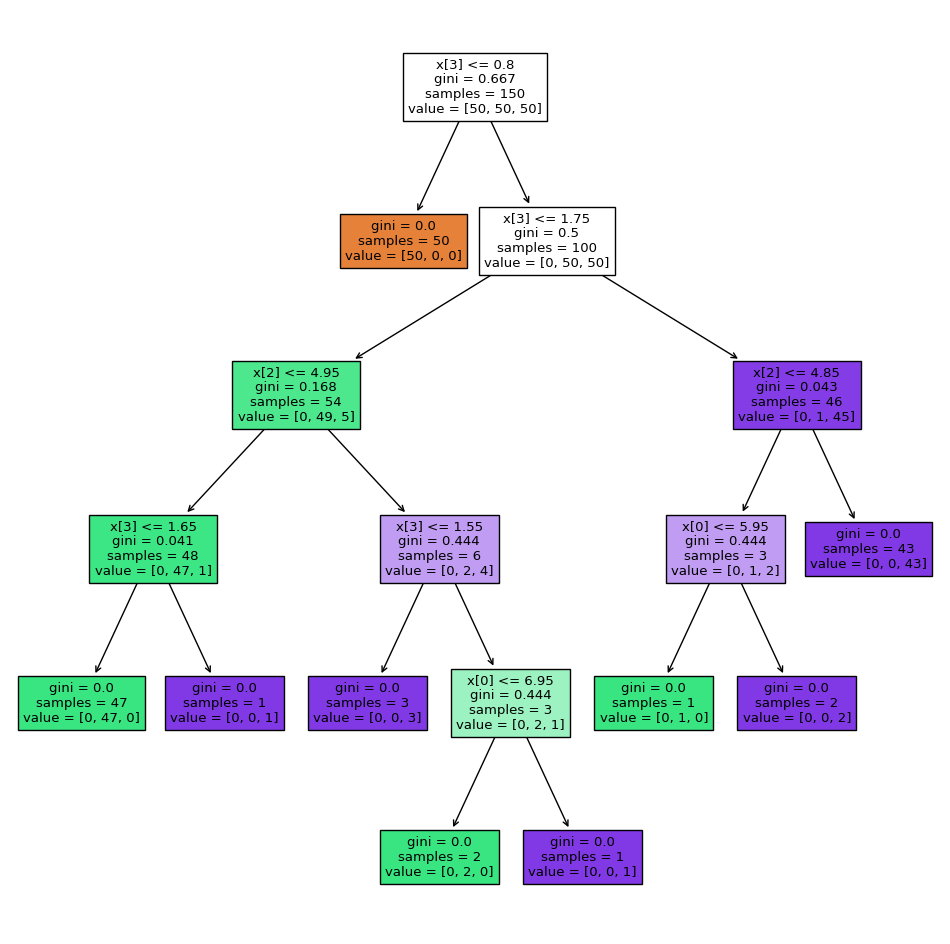

In [2]:

import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier, plot_tree
plt.figure(figsize=(12,12))
tree.plot_tree(clf, filled=True)
plt.show()

Los algoritmos de aprendizaje automático de clasificación aprenden a asignar etiquetas a los ejemplos que le damos como input.

Las caracteristica de input representan un espacio de entrada continuo.

Podemos pensar en cada característica de entrada definiendo un eje o dimensión en un espacio de características. Dos entradas definen un espacio de observaciones que es un plano, con puntos que representan las coordenadas de entrada en el espacio de entrada. Si hubiera tres variables de entrada, el espacio de características sería un volumen tridimensional.

A cada punto del espacio se le puede asignar una etiqueta de clase. Esto lo representamos por medio de distintos colores.

El objetivo de un algoritmo de clasificación es aprender a dividir el espacio de características de modo que las etiquetas se asignen correctamente a los puntos en el espacio de características, o al menos, lo más correctamente posible.

Esta es una comprensión geométrica útil del modelado predictivo de clasificación.

Una vez que un algoritmo de aprendizaje automático de clasificación divide un espacio de características, podemos clasificar cada punto en el espacio de características, en alguna cuadrícula arbitraria, para tener una idea de cómo exactamente el algoritmo eligió dividir el espacio de características.

Esto se denomina superficie de decisión o límite de decisión y proporciona una herramienta de diagnóstico para comprender un modelo en una tarea de modelado predictivo de clasificación.

Aunque la noción de "superficie" sugiere un espacio de características bidimensional, el método se puede utilizar con espacios de características con más de dos dimensiones, donde se crea una superficie para cada par de características de entrada.

<ipython-input-3-35d831bedd4e>:43: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X[idx, 0], X[idx, 1], c=color, label=iris.target_names[i],
<ipython-input-3-35d831bedd4e>:43: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X[idx, 0], X[idx, 1], c=color, label=iris.target_names[i],
<ipython-input-3-35d831bedd4e>:43: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X[idx, 0], X[idx, 1], c=color, label=iris.target_names[i],
<ipython-input-3-35d831bedd4e>:43: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X[idx, 0], X[idx, 1], c=color, label=iris.target_names[i],
<ipython-input-3-35d831bedd4e>:43: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X[idx, 0], X[idx, 1], c=color, label=iris.target_names[i],
<ipython-i

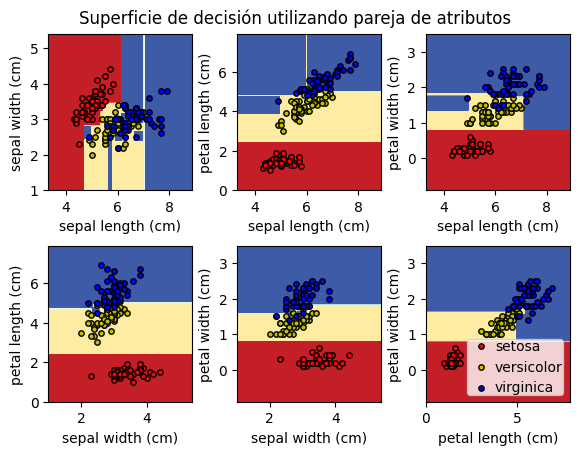

In [3]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier, plot_tree

# Parameters
n_classes = 3
plot_colors = "ryb"
plot_step = 0.02

# Load data
iris = load_iris()

for pairidx, pair in enumerate([[0, 1], [0, 2], [0, 3],
                                [1, 2], [1, 3], [2, 3]]):
    # We only take the two corresponding features
    X = iris.data[:, pair]
    y = iris.target

    # Train
    clf = DecisionTreeClassifier().fit(X, y)

    # Plot the decision boundary
    plt.subplot(2, 3, pairidx + 1)

    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                         np.arange(y_min, y_max, plot_step))
    plt.tight_layout(h_pad=0.5, w_pad=0.5, pad=2.5)

    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    cs = plt.contourf(xx, yy, Z, cmap=plt.cm.RdYlBu)

    plt.xlabel(iris.feature_names[pair[0]])
    plt.ylabel(iris.feature_names[pair[1]])

    # Plot the training points
    for i, color in zip(range(n_classes), plot_colors):
        idx = np.where(y == i)
        plt.scatter(X[idx, 0], X[idx, 1], c=color, label=iris.target_names[i],
                    cmap=plt.cm.RdYlBu, edgecolor='black', s=15)

plt.suptitle("Superficie de decisión utilizando pareja de atributos")
plt.legend(loc='lower right', borderpad=0, handletextpad=0)
plt.axis("tight")
plt.show()

## Fuentes

https://www.geeksforgeeks.org/decision-tree-implementation-python/
https://www.datacamp.com/community/tutorials/decision-tree-classification-python
https://machinelearningmastery.com/implement-decision-tree-algorithm-scratch-python/
https://scikit-learn.org/stable/modules/tree.html#tree